In [1]:
#Please execute this cell
import sys;
sys.path.append('../../'); 
import jupman;

# Exam -  Tue 02, July 2019 - solutions

**Scientific Programming - Data Science Master @ University of Trento**


## Introduction

* **Taking part to this exam erases any vote you had before**



### Grading


* **Correct implementations**: Correct implementations with the required complexity grant you full grade.
* **Partial implementations**: Partial implementations _might_ still give you a few points. If you just can't solve an exercise,  try to solve it at least for some subcase (i.e. array of fixed size 2) commenting why you did so. 
* **Bonus point**: One bonus point can be earned by writing stylish code. You got style if you:

    - do not infringe the [Commandments](https://datasciprolab.readthedocs.io/en/latest/commandments.html)
    - write [pythonic code](http://docs.python-guide.org/en/latest/writing/style)
    - avoid convoluted code like i.e.

        ```
        if x > 5:
            return True
        else:
            return False
        ```

        when you could write just

        ```
        return x > 5
        ```       

### Valid code

<div class="alert alert-warning">

**WARNING**: MAKE SURE ALL EXERCISE FILES AT LEAST COMPILE !!! 
10 MINS BEFORE THE END OF THE EXAM I WILL ASK YOU TO DO A FINAL CLEAN UP OF THE CODE 
</div>



<div class="alert alert-warning">

**WARNING**: _ONLY_ IMPLEMENTATIONS OF THE PROVIDED FUNCTION SIGNATURES WILL BE EVALUATED !!!!!!!!! <br/>    

</div>


For example, if you are given to implement: 

```python
    def f(x):
        raise Exception("TODO implement me")
```

and you ship this code:

``` python
def my_f(x):
    # a super fast, correct and stylish implementation

def f(x):
    raise Exception("TODO implement me")
```

We will assess only the latter one `f(x)`, and conclude it doesn't work at all :P   !!!!!!!

**Helper functions**

Still, you are allowed to define any extra helper function you might need. If your `f(x)` implementation calls some other function you defined like `my_f` here, it is ok:

```python
# Not called by f, will get ignored:
def my_g(x):
    # bla

# Called by f, will be graded:
def my_f(y,z):
    # bla

def f(x):
    my_f(x,5)
    

```



### How to edit and run

To edit the files, you can use any editor of your choice,  you can find them under _Applications->Programming_:

* **Visual Studio Code**
* Editra is easy to use, you can find it under _Applications->Programming->Editra_.
* Others could be _GEdit_ (simpler), or _PyCharm_ (more complex).

To run the tests, use **the Terminal** which can be found in _Accessories -> Terminal_ 



<div class="alert alert-info">

**IMPORTANT**: Pay close attention to the comments of the functions.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ modify function signatures! Just provide the implementation.
</div>

<div class="alert alert-warning">

**WARNING**: <i>DON'T</i> change the existing test methods, just add new ones !!!  You can add as many as you want.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ create other files. If you still do it, they won't be evaluated.
</div>




### Debugging 

If you need to print some debugging information, you are allowed to put extra <code>print</code>
    statements in the function bodies.


<div class="alert alert-warning">

**WARNING:** even if print statements are allowed, be careful with prints that might
     break your function! 
</div>


For example, avoid stuff like this: 

```python
x = 0
print(1/x)
```


### What to do

1) Download  `datasciprolab-2019-07-02-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
datasciprolab-2019-07-02-FIRSTNAME-LASTNAME-ID
    |-jupman.py
    |-sciprog.py
    |-other stuff ...
    |-exams
        |-2019-07-02
            |- exam-2019-07-02-exercise.ipynb
            |- B1-theory.txt
            |- B2_linked_sort_exercise.py
            |- B2_linked_sort_test.py
            |- B3_stacktris_exercise.py
            |- B3_stacktris_test.py
            
            
```

2) Rename `datasciprolab-2019-07-02-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `datasciprolab-2019-07-02-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually
 


## Part A

Open Jupyter and start editing this notebook `exam-2019-07-02-exercise.ipynb`


### A1 Botteghe storiche

You will work on the dataset of _Botteghe storiche del Trentino" (small shops, workshops of Trentino)

Data provider: [Provincia Autonoma di Trento - dati.trentino.it](https://dati.trentino.it/dataset/botteghe-storiche-del-trentino)

A function `load_botteghe` is given to load the dataset (you don’t need to implement it):

In [2]:
def load_botteghe():
    """Loads file data and RETURN a list of dictionaries with the botteghe dati
    """

    import csv
    with open('data/botteghe.csv', newline='',  encoding='utf-8',) as csvfile:
        reader = csv.DictReader(csvfile,  delimiter=',')
        lst = []
        for d in reader:
            lst.append(d)
    return lst


botteghe = load_botteghe()



<div class="alert alert-warning">

**IMPORTANT**: look at the dataset by yourself !

Here we show only first 5 rows, but to get a clear picture of the dataset you need to study it by yourself

</div>


In [3]:
botteghe[:5]

[{'Cap': '38068',
  'Civico': '30',
  'Comune': 'Sover',
  'Frazione/Località': 'Piscine di Sover',
  'Indirizzo': 'Via del Lagorai',
  'Insegna': 'BAZZANELLA RENATA',
  'Note': 'generi misti, bar - ristorante',
  'Numero': '1'},
 {'Cap': '38051',
  'Civico': '48',
  'Comune': 'Borgo Valsugana',
  'Frazione/Località': '',
  'Indirizzo': 'Corso Ausugum',
  'Insegna': 'CONFEZIONI MONTIBELLER S.R.L.',
  'Note': 'esercizio commerciale',
  'Numero': '2'},
 {'Cap': '38051',
  'Civico': '8',
  'Comune': 'Borgo Valsugana',
  'Frazione/Località': '',
  'Indirizzo': 'Largo Dordi',
  'Insegna': 'FOTOGRAFICA TRINTINAGLIA UMBERTO S.N.C.',
  'Note': 'esercizio commerciale, attività artigianale',
  'Numero': '3'},
 {'Cap': '38055',
  'Civico': '24',
  'Comune': 'Grigno',
  'Frazione/Località': 'Serafini',
  'Indirizzo': '',
  'Insegna': 'BAR SERAFINI DI MINATI RENZO',
  'Note': 'esercizio commerciale',
  'Numero': '4'},
 {'Cap': '38066',
  'Civico': '35',
  'Comune': 'Riva del Garda',
  'Frazione/Loc

We would like to know which different categories of _bottega_ there are, and count them. Unfortunately, there is no specific field for _Categoria_, so we will need to extract this information from other fields such as `Insegna` and `Note`. For example, this `Insegna` contains the category `BAR`, while the `Note` (_commercial enterprise_) is a bit too generic to be useful:

```python
    'Insegna': 'BAR SERAFINI DI MINATI RENZO',
    'Note': 'esercizio commerciale',
```

while this other `Insegna` contains just the owner name and  `Note` holds both the categories `bar` and `ristorante`:

```python
    'Insegna': 'BAZZANELLA RENATA',
    'Note': 'generi misti, bar - ristorante',
```

As you see, data is non uniform: 

* sometimes the category is in the `Insegna`
* sometimes is in the `Note`
* sometimes is in both
* sometimes is lowercase
* sometimes is uppercase
* sometimes is single
* sometimes is multiple (`bar - ristorante`)

First we want to extract all categories we can find, and rank them according their frequency, from most frequent to least frequent.

To do so, you need to

- count all words you can find in both `Insegna` and `Note` fields, and sort them. Note you need to normalize the uppercase. 

- consider a category relevant if it is present at least 11 times in the dataset.

- filter non relevant words: some words like prepositions, type of company (`'S.N.C'`, `S.R.L.`, ..), etc will appear a lot, and will need to be ignored. To detect them, you are given a list called `stopwords`.

**NOTE**: the rules above do not actually extract all the categories, for the sake of the exercise we only keep the most frequent ones. 

### A1.1 rank_categories

In [4]:
def rank_categories(db, stopwords):
    #jupman-raise
    ret = {}
    for diz in db:
        parole = diz['Insegna'].split(" ") + diz['Note'].upper().split(" ") 
        for parola in parole:
            if parola in ret and not parola in stopwords:
                ret[parola] += 1
            else:
                ret[parola] = 1
    return sorted([(key, val) for key,val in ret.items() if val > 10], key=lambda c: c[1], reverse=True)
    #/jupman-raise

stopwords = ['',
             'S.N.C.', 'SNC','S.A.S.', 'S.R.L.', 'S.C.A.R.L.', 'SCARL','S.A.S', 'COMMERCIALE','FAMIGLIA','COOPERATIVA',
             '-', '&', 'C.', 'ESERCIZIO',
             'IL', 'DE', 'DI','A', 'DA', 'E', 'LA', 'AL',  'DEL', 'ALLA', ]
categories = rank_categories(botteghe, stopwords)

categories  

[('BAR', 191),
 ('RISTORANTE', 150),
 ('HOTEL', 67),
 ('ALBERGO', 64),
 ('MACELLERIA', 27),
 ('PANIFICIO', 22),
 ('FARMACIA', 21),
 ('CALZATURE', 21),
 ('ALIMENTARI', 20),
 ('SPORT', 16),
 ('PIZZERIA', 16),
 ('FERRAMENTA', 12),
 ('TABACCHI', 12),
 ('BAZAR', 11)]

### A1.2 plot

Now plot the 10 most frequent categories. Please pay attention to plot title, width and height, axis labels. Everything MUST display in a readable way.

In [5]:
# write here



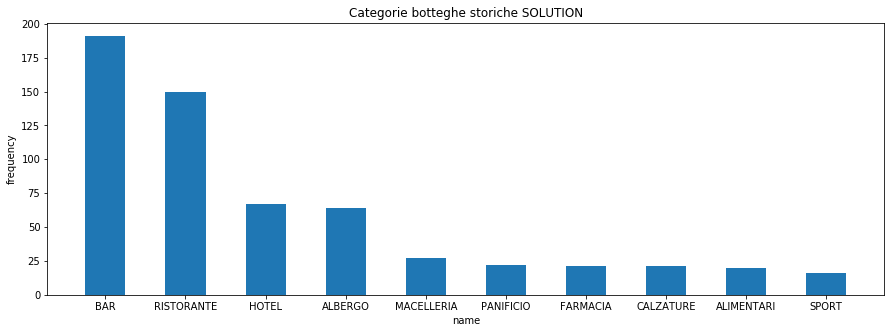

In [6]:

# SOLUTION

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

cats = categories[:10]

xs = np.arange(len(cats))

xs_labels = [t[0] for t in cats]

ys = [t[1] for t in cats]

fig = plt.figure(figsize=(15,5))

plt.bar(xs, ys, 0.5, align='center')

plt.title("Categorie botteghe storiche SOLUTION")
plt.xticks(xs, xs_labels)

plt.xlabel('name')
plt.ylabel('frequency')

plt.show()



### A1.3 enrich

Once you found the categories, implement function `enrich`, which takes the db and previously computed categories, and RETURN a NEW DB where the dictionaries are enriched with a new field `Categorie`, which holds a list of the categories a particular _bottega_ belongs to. 

In [7]:
def enrich(db, categories):
    #jupman-raise
    ret = []
    
    for diz in db:
        new_diz = {key:val for key,val in diz.items()}
        new_diz['Categorie'] = []
        for cat in categories:
            if cat[0] in diz['Insegna'].upper() or cat[0] in diz['Note'].upper():
                new_diz['Categorie'].append(cat[0])
        ret.append(new_diz)
    return ret
    #/jupman-raise


new_db = enrich(botteghe, rank_categories(botteghe, stopwords))                

new_db[:6]   #NOTE here we only show a sample

[{'Cap': '38068',
  'Categorie': ['BAR', 'RISTORANTE'],
  'Civico': '30',
  'Comune': 'Sover',
  'Frazione/Località': 'Piscine di Sover',
  'Indirizzo': 'Via del Lagorai',
  'Insegna': 'BAZZANELLA RENATA',
  'Note': 'generi misti, bar - ristorante',
  'Numero': '1'},
 {'Cap': '38051',
  'Categorie': [],
  'Civico': '48',
  'Comune': 'Borgo Valsugana',
  'Frazione/Località': '',
  'Indirizzo': 'Corso Ausugum',
  'Insegna': 'CONFEZIONI MONTIBELLER S.R.L.',
  'Note': 'esercizio commerciale',
  'Numero': '2'},
 {'Cap': '38051',
  'Categorie': [],
  'Civico': '8',
  'Comune': 'Borgo Valsugana',
  'Frazione/Località': '',
  'Indirizzo': 'Largo Dordi',
  'Insegna': 'FOTOGRAFICA TRINTINAGLIA UMBERTO S.N.C.',
  'Note': 'esercizio commerciale, attività artigianale',
  'Numero': '3'},
 {'Cap': '38055',
  'Categorie': ['BAR'],
  'Civico': '24',
  'Comune': 'Grigno',
  'Frazione/Località': 'Serafini',
  'Indirizzo': '',
  'Insegna': 'BAR SERAFINI DI MINATI RENZO',
  'Note': 'esercizio commerciale',

### A2 dump

The multinational ToxiCorp wants to hire you for devising an automated truck driver which will deposit highly contaminated waste in the illegal dumps they own worldwide. You find it ethically questionable, but they pay well, so you accept.

A dump is modelled as a rectangular region of dimensions `nrow` and `ncol`, implemented as a list of lists matrix. Every cell `i`, `j` contains the tons of waste present, and can contain _at most_ `7` tons of waste. 

The dumpster truck will transport `q` tons of waste, and try to fill the dump by depositing waste in the first row, filling each cell up to 7 tons. When the first row is filled, it will proceed to the second one _from the left_ , then to the third one again _from the left_ until there is no waste to dispose of. 

Function `dump(m, q)` takes as input the dump `mat` and the number of tons `q` to dispose of, and RETURN a NEW list representing a plan with the sequence of tons to dispose. If waste to dispose exceeds dump capacity, raises `ValueError`.

**NOTE**: the function does **not** modify the matrix

**Example:**

```python
m = [          
        [5,4,6],   
        [4,7,1],   
        [3,2,6],   
        [3,6,2],   
]

dump(m, 22)

[2, 3, 1, 3, 0, 6, 4, 3]

```

For first row we dispose of 2,3,1 tons in three cells, for second row we dispose of 3,0,6 tons in three cells, for third row we only dispose 4, 3 tons in two cells as limit q=22 is reached.




In [8]:
def dump(mat, q):
    #jupman-raise
    rem = q
    ret = []
    
    for riga in mat:
        for j in range(len(riga)):
            cellfill = 7 - riga[j]
            unload = min(cellfill, rem)
            rem -= unload
            
            if rem > 0:                
                ret.append(unload)            
            else:             
                if unload > 0:
                    ret.append(unload)            
                return ret
                  
    if rem > 0:
        raise ValueError("Couldn't fill the dump, %s tons remain!")
    #/jupman-raise
    
m1 = [
    [5]
]     

assert dump(m1,0) == []  # nothing to dump

m2 = [
    [4]
]     

assert dump(m2,2) == [2]

m3 = [
    [5,4]   
]     

assert dump(m3,3) == [2, 1]


m3 = [
    [5,7,3]   
]     

assert dump(m3,3) == [2, 0, 1]


m5 = [
    [2,5],   # 5 2
    [4,3]    # 3 1
    
]     

assert dump(m5,11) == [5,2,3,1]


m6 = [         # tons to dump in each cell
    [5,4,6],   # 2 3 1     
    [4,7,1],   # 3 0 6     
    [3,2,6],   # 4 3 0     
    [3,6,2],   # 0 0 0
]


assert dump(m6, 22) == [2,3,1,3,0,6,4,3]


try:
    dump ([[5]], 10)
    raise Exception("Should have failed !")
except ValueError:
    pass

## Part B

### B1 Theory

**Write the solution in separate `theory.txt` file**

Let `L1` and `L2` be two lists containing `n` lists, each of them of size `n`. Compute the
computational complexity of function `fun()` with respect to `n`.


```python

def fun(L1,L2):
    for r1 in L1:
        for val in r1:
            for r2 in L2:
                if val = sum(r2):
                    print(val)

```

**ANSWER**: $\Theta(n^4) $

### B2 Linked List sorting

**Open a text editor** and edit file `linked_sort_exercise.py`

### B2.1 bubble_sort

You will implement bubble sort on a `LinkedList`. 

    def bubble_sort(self):
        """ Sorts in-place this linked list using the method of bubble sort
        
            - MUST execute in O(n^2) where n is the length of the linked list
        """

**Testing**: `python3 -m unittest linked_sort_test.BubbleSortTest`

As a reference, you can look at this `example_bubble` implementation below that operates on regular python lists. Basically, you will have to translate the `for` cycles into two suitable `while` and use node pointers.

**NOTE**: this version of the algorithm is inefficient as we do not use `j` in the inner loop: your linked list implementation can have this inefficiency as well.


In [9]:
def example_bubble(plist):
    for j in range(len(plist)):
        for i in range(len(plist)):
            if i + 1 < len(plist) and plist[i]>plist[i+1]:
                temp = plist[i]
                plist[i] = plist[i+1]
                plist[i+1] = temp

my_list = [23, 34, 55, 32, 7777, 98, 3, 2, 1]
example_bubble(my_list)
print(my_list)


[1, 2, 3, 23, 32, 34, 55, 98, 7777]



### B2.2 merge

Implement this method:

```python
    def merge(self,l2):
        """ Assumes this linkedlist and l2 linkedlist contain integer numbers
            sorted in ASCENDING order, and  RETURN a NEW LinkedList with
            all the numbers from this and l2 sorted in DESCENDING order

            IMPORTANT 1: *MUST* EXECUTE IN O(n1+n2) TIME where n1 and n2 are
                         the sizes of this and l2 linked_list, respectively
                         
            IMPORTANT 2: *DO NOT* attempt to convert linked lists to
                         python lists!
        """
```

**Testing**: `python3 -m unittest linked_sort_test.MergeTest`

### B3 Stacktris

**Open a text editor** and edit file `stacktris_exercise.py`

A `Stacktris` is a data structure that operates like the famous game Tetris, with some restrictions:

- Falling pieces can be either of length 1 or 2. We call them `1-block` and `2-block` respectively
- The pit has a fixed width of 3 columns
- `2-block`s can only be in horizontal

We print a `Stacktris` like this: 

```
\ j 012
i
4  | 11|    # two 1-block
3  | 22|    # one 2-block
2  | 1 |    # one 1-block
1  |22 |    # one 2-block
0  |1 1|    # on the ground there are two 1-block
```



In Python, we model the `Stacktris` as a class holding in the variable `_stack` a list of lists of integers, which models the pit:

```python

class Stacktris:

    def __init__(self):
        """ Creates a Stacktris
        """
        self._stack = []

```

So in the situation above the `_stack` variable would look like this (notice row order is inverted with respect to the print)

```python
[ 
    [1,0,1],
    [2,2,0],
    [0,1,0],
    [0,2,2],
    [0,1,1],
]
```

The class has three methods of interest which you will implement,  `drop1(j)` ,  `drop2h(j)` and `_shorten`



**Example**

Let's see an example:

In [10]:
from stacktris_solution import * 

st = Stacktris()

At the beginning the pit is empty:

In [11]:
st

Stacktris: 
EMPTY

We can start by dropping from the ceiling a block of dimension 1 into the last column at index `j=2`. By doing so, a new row will be created, and will be a list containing the numbers `[0,0,1]`

**IMPORTANT**: zeroes are not displayed

In [12]:
st.drop1(2)

DEBUG:  Stacktris: 
        |  1|
        


[]

Now we drop an horizontal block of dimension 2 (a `2-block`) having the leftmost block at column `j=1`. Since below in the pit there is already the `1` block we previosly put, the new block will fall and stay upon it. Internally, we will add a new row as a python list containing the numbers `[0,2,2]`

In [13]:
st.drop2h(1)

DEBUG:  Stacktris: 
        | 22|
        |  1|
        


[]

We see the zeroth column is empty, so if we drop there a `1-block` it will fall to the ground. Internally, the zeroth list will become `[1,0,1]`:

In [14]:
st.drop1(0)

DEBUG:  Stacktris: 
        | 22|
        |1 1|
        


[]

Now we drop again a `2-block` at column `j=2`, on top of the previously laid one. This will add a new row as list `[0,2,2]`.

In [15]:
st.drop2h(1)

DEBUG:  Stacktris: 
        | 22|
        | 22|
        |1 1|
        


[]

In the game Tetris, when a row becomes completely filled it disappears. So if we drop a `1-block` to the leftmost column, the mid line should be removed. 

**NOTE**: The messages on the console are just debug print, the function `drop1` only returns the extracted line `[1,2,2]`:

In [16]:
st.drop1(0)

DEBUG:  Stacktris: 
        | 22|
        |122|
        |1 1|
        
DEBUG:  POPPING [1, 2, 2]
DEBUG:  Stacktris: 
        | 22|
        |1 1|
        


[1, 2, 2]

Now we insert another `2-block` starting at `j=0`. It will fall upon the previously laid one: 

In [17]:
st.drop2h(0)

DEBUG:  Stacktris: 
        |22 |
        | 22|
        |1 1|
        


[]

We can complete teh topmost row by dropping a `1-block` to the rightmost column. As a result, the row will be removed from the stack and the row will be returned by the call to `drop1`:

In [18]:
st.drop1(2)

DEBUG:  Stacktris: 
        |221|
        | 22|
        |1 1|
        
DEBUG:  POPPING [2, 2, 1]
DEBUG:  Stacktris: 
        | 22|
        |1 1|
        


[2, 2, 1]

Another line completion with a `drop1` at column `j=0`:

In [19]:
st.drop1(0)

DEBUG:  Stacktris: 
        |122|
        |1 1|
        
DEBUG:  POPPING [1, 2, 2]
DEBUG:  Stacktris: 
        |1 1|
        


[1, 2, 2]

We can finally empty the Stacktris by dropping a `1-block` in the mod column:

In [20]:
st.drop1(1)

DEBUG:  Stacktris: 
        |111|
        
DEBUG:  POPPING [1, 1, 1]
DEBUG:  Stacktris: 
        EMPTY


[1, 1, 1]

### B3.1 _shorten

Start by implementing this private method:

```python
    def _shorten(self):      
        """ Scans the Stacktris from top to bottom searching for a completely filled line:
            - if found, remove it from the Stacktris and return it as a list.
            - if not found, return an empty list.
        """
```
If you wish, you can add debug prints but they are not mandatory

**Testing**: `python3 -m unittest stacktris_test.ShortenTest`

### B3.2 drop1

Once you are done with the previous function, implement `drop1` method:

**NOTE**: In the implementation, feel free to call the previously implemented `_shorten` method.

```python
    def drop1(self, j):
        """ Drops a 1-block on column j. 
        
             - If another block is found,  place the 1-block on top of that block,
               otherwise place it on the ground.

            - If, after the 1-block is placed, a row results completely filled, removes 
              the row and RETURN it. Otherwise, RETURN an empty list.

            - if index `j` is outside bounds, raises ValueError
        """        

```

**Testing**: `python3 -m unittest stacktris_test.Drop1Test`

### B3.3 drop2h

Once you are done with the previous function, implement `drop2` method:


```python

    def drop2h(self, j):
        """ Drops a 2-block horizontally with left block on column j, 

             - If another block is found,  place the 2-block on top of that block,
               otherwise place it on the ground.

            - If, after the 2-block is placed, a row results completely filled, 
              removes the row and RETURN it. Otherwise, RETURN an empty list.        
        
            - if index `j` is outside bounds, raises ValueError
        """        
```

**Testing**: `python3 -m unittest stacktris_test.Drop2hTest`

In [22]:
#jupman-strip
import linked_sort_test 
jupman.run(linked_sort_test)

import stacktris_solution
import stacktris_test
stacktris_solution.DEBUG = False
jupman.run(stacktris_test)
#/jupman-strip

....................
----------------------------------------------------------------------
Ran 20 tests in 0.014s

OK
................................
----------------------------------------------------------------------
Ran 32 tests in 0.033s

OK
